Short Backwarding for Selecting the Best Historical Agent in a Consulting System for Portfolio Allocation with Deep Reinforcement Learning

## 2.0 Download the Data for the Analysis
---
* Data is Downloaded from Yahoo Finance using an API in the FinRL Library
* The 30 Dow Jones Industrial Average tickers for the period from 2009 to 2020 are used
* The data is downloaded and the cleaned data are saved in csv files for use

---


### 2.1 Import Relevant Packages

In [1]:
import pandas as pd
import numpy as np
from config import config
import matplotlib.pylab as plt

import yfinance as yf
from pandas_datareader import data as pdr

%matplotlib inline

### 2.2 Create Folders

In [2]:
import os
if not os.path.exists("./" + config.DATA_SAVE_DIR):
    os.makedirs("./" + config.DATA_SAVE_DIR)
if not os.path.exists("./" + config.TRAINED_MODEL_DIR):
    os.makedirs("./" + config.TRAINED_MODEL_DIR)
if not os.path.exists("./" + config.TENSORBOARD_LOG_DIR):
    os.makedirs("./" + config.TENSORBOARD_LOG_DIR)
if not os.path.exists("./" + config.RESULTS_DIR):
    os.makedirs("./" + config.RESULTS_DIR)

### 2.3 Download the Dow Jines Industrial Average 30 Stocks

In [3]:
ticker_list = config.DOW_30_TICKER

In [4]:
#Download the data

import yfinance as yf

df = yf.download(ticker_list, start='2008-01-01', end='2024-03-29')


#df = pdr.get_data_yahoo([ticker_list][0],   start='2008-01-01', end="2021-01-01")

[*********************100%%**********************]  30 of 30 completed


In [5]:

data = df.copy()
#data = pd.read_csv('datasets\data.csv')

In [6]:
data

Price        Adj Close                                                 \
Ticker            AAPL         AXP          BA         CAT       CSCO   
Date                                                                    
2008-01-02    5.883142   39.221825   63.481617   45.230278  17.845201   
2008-01-03    5.885861   38.737675   63.745445   45.070183  17.986408   
2008-01-04    5.436562   37.761761   62.895302   43.885475  17.562799   
2008-01-07    5.363794   37.930820   60.733337   44.013554  17.569521   
2008-01-08    5.170849   36.847301   58.564026   43.001755  17.098848   
...                ...         ...         ...         ...        ...   
2024-03-22  172.046646  224.593109  188.850006  356.809326  48.957169   
2024-03-25  170.618591  224.662689  191.410004  354.657196  48.858826   
2024-03-26  169.480133  223.102173  187.500000  355.095612  48.730976   
2024-03-27  173.075241  226.372269  191.949997  363.325592  48.947342   
2024-03-28  171.247726  226.312653  192.990005  365.099121  49.085026   

Price                                                                  ...  \
Ticker             CVX         DD         DIS          GS          HD  ...   
Date                                                                   ...   
2008-01-02   49.213249  34.275219   26.801104  158.293335   17.149609  ...   
2008-01-03   49.818787  34.080631   26.742188  156.188782   16.959127  ...   
2008-01-04   49.155304  32.718456   26.203468  152.444992   16.394266  ...   
2008-01-07   48.512867  32.886520   26.228722  148.480042   16.663565  ...   
2008-01-08   47.891510  32.621162   25.706841  144.492218   16.249760  ...   
...                ...        ...         ...         ...         ...  ...   
2024-03-22  153.113876  75.388237  115.337891  404.372894  387.585602  ...   
2024-03-25  154.905777  75.587311  118.811867  402.504181  380.862335  ...   
2024-03-26  153.717773  75.189171  119.379250  403.736725  377.307037  ...   
2024-03-27  154.786987  76.144707  120.424423  412.752167  383.225922  ...   
2024-03-28  156.163086  76.313919  121.798088  415.177490  380.951721  ...   

Price         Volume                                                   \
Ticker           PFE        PG       RTX      TRV      UNH          V   
Date                                                                    
2008-01-02  48466820  12255300   6773748  2341400  7698700        NaN   
2008-01-03  47926223  11162800   6921366  2098800  4864000        NaN   
2008-01-04  44292453  10049000   8803537  3048900  7250600        NaN   
2008-01-07  50715107  11916000   9297080  3130300  6093200        NaN   
2008-01-08  54701441  17169100  13110680  4684600  8142700        NaN   
...              ...       ...       ...      ...      ...        ...   
2024-03-22  28789000   6393200   6800600   844000  2847000  8743000.0   
2024-03-25  31110600   7145600   5229300   748400  2786100  8519200.0   
2024-03-26  38220300   5842700   5474300   922000  3113300  8752400.0   
2024-03-27  34247600   6599700   7267800   967600  2653100  5190700.0   
2024-03-28  40466700   7191500  10701000   871100  3820000  5844400.0   

Price                                               
Ticker            VZ       WBA       WMT       XOM  
Date                                                
2008-01-02  10865660   7298800  59755800  23351900  
2008-01-03   9017975  16204900  59403000  19160600  
2008-01-04  11886820  11552400  61053600  24730900  
2008-01-07  16094216   7723200  60979500  28937500  
2008-01-08  37362464   9053600  57051300  21764500  
...              ...       ...       ...       ...  
2024-03-22  17815600   8219000  14025400  14695400  
2024-03-25  14587200  10464100  14186600  14011700  
2024-03-26  17854100  10183300  13738300  13152300  
2024-03-27  19260100  12394400  14363400  12415700  
2024-03-28  19771400  32886800  17535100  18482100  

[4088 rows x 180 columns]

In [7]:
data = data.stack().reset_index()
data.columns.names = [None]
data = data.drop(['Close'], axis=1)

C:\Users\shahin\AppData\Local\Temp\ipykernel_8360\1383617117.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  data = data.stack().reset_index()


In [8]:
data.head()

,Date,Ticker,Adj Close,High,Low,Open,Volume
0,2008-01-02,AAPL,5.883142,7.152143,6.876786,7.116786,1.079179e+09
1,2008-01-02,AXP,39.221825,52.320000,50.790001,52.090000,8.053700e+06
2,2008-01-02,BA,63.481617,87.839996,86.000000,87.570000,4.303000e+06
3,2008-01-02,CAT,45.230278,72.669998,70.050003,72.559998,6.337800e+06
4,2008-01-02,CSCO,17.845201,27.299999,26.209999,27.000000,6.433890e+07


In [9]:
data.columns = ['date','tic','close','high','low','open','volume']

In [10]:
data.columns

Index(['date', 'tic', 'close', 'high', 'low', 'open', 'volume'], dtype='object')

### 2.4 Clean the Data

In [11]:
# check for missing values
data.isna().sum()

date      0
tic       0
close     0
high      0
low       0
open      0
volume    0
dtype: int64

In [12]:
# check if all tickers have the same number of data points

no_datasets = []
for i in ticker_list:
    no_data_points = data[data['tic']==i].shape[0]
    no_datasets.append((i,no_data_points))
    data_points_df = pd.DataFrame(no_datasets)

In [13]:
data_points_df.head()

,0,1
0,AAPL,4088
1,MSFT,4088
2,JPM,4088
3,V,4035
4,RTX,4088


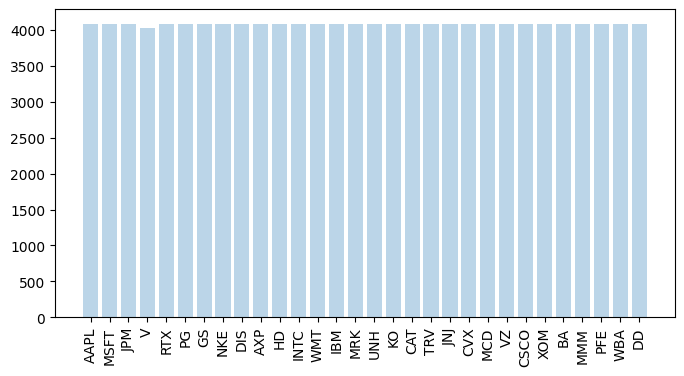

In [14]:
# Plot a bar chart to check that all tickers have same number of data points
plt.subplots(figsize = (8, 4))
plt.bar(data_points_df[0], data_points_df[1],alpha=0.3)
plt.xticks(rotation=90)
plt.show()

In [15]:
# create a list for dates with all ticker data points
date_list = list(data[data['tic']=='V'].date)
# filter with date list
data_filtered = data[data['date'].isin(date_list)]

In [16]:
# check if all tickers have the same number of data points

no_datasets = []
for i in ticker_list:
    no_data_points = data_filtered[data_filtered['tic']==i].shape[0]
    no_datasets.append((i,no_data_points))
    data_points_df = pd.DataFrame(no_datasets)

In [17]:
data_points_df.head()

,0,1
0,AAPL,4035
1,MSFT,4035
2,JPM,4035
3,V,4035
4,RTX,4035


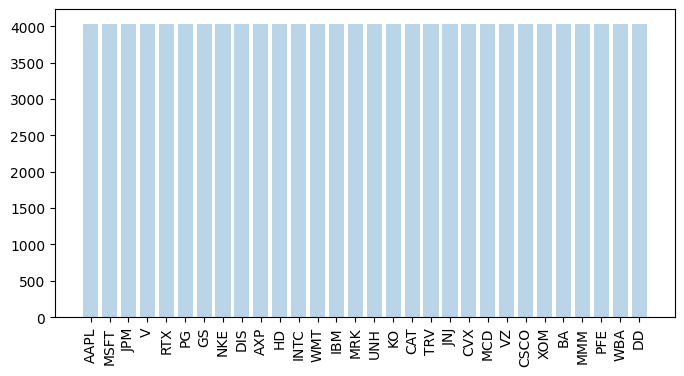

In [18]:
# Plot a bar chart to check that all tickers have same number of data points
plt.subplots(figsize = (8, 4))
plt.bar(data_points_df[0], data_points_df[1],alpha=0.3)
plt.xticks(rotation=90)
plt.show()

In [19]:
data_filtered.head()

,date,tic,close,high,low,open,volume
1537,2008-03-19,AAPL,3.915351,4.796071,4.631071,4.754286,1.010537e+09
1538,2008-03-19,AXP,32.274982,44.480000,41.919998,44.200001,1.409830e+07
1539,2008-03-19,BA,54.094551,77.000000,73.449997,76.980003,9.195600e+06
1540,2008-03-19,CAT,47.481445,77.000000,73.730003,76.620003,7.377400e+06
1541,2008-03-19,CSCO,16.453354,25.580000,24.459999,25.469999,6.398860e+07


### 2.5 Save the Data to csv

In [20]:
data_filtered.to_csv('datasets/data.csv', index=False)

### 2.6 Create a Dataset for the Close Prices

In [21]:
# read the data from the saved csv file
df_prices = pd.read_csv('./datasets/data.csv')

In [22]:
# Reset the Index to tic and date
df_prices = df_prices.reset_index().set_index(['tic', 'date']).sort_index()

# Get the list of all the tickers
tic_list = list(set([i for i,j in df_prices.index]))

# Create an empty data frame for the close prices
df_close = pd.DataFrame()

In [23]:
len(tic_list)

30

In [24]:
# Reset the Index to tic and date
df_prices = df_prices.reset_index().set_index(['tic', 'date']).sort_index()

# Get all the Close Prices
df_close = pd.DataFrame()

for ticker in tic_list:
    series = df_prices.xs(ticker).close
    df_close[ticker] = series
    
df_close = df_close.reset_index()

In [25]:
df_close.head()

,date,HD,TRV,V,KO,CAT,IBM,JNJ,CSCO,DD,...,PG,CVX,INTC,MRK,VZ,RTX,MMM,JPM,DIS,MSFT
0,2008-03-19,17.789196,31.220434,12.605220,18.092831,47.481445,64.913155,40.176624,16.453354,32.205433,...,42.133190,43.431343,13.014486,23.086517,14.193676,29.209349,40.100838,27.803442,26.296059,20.830702
1,2008-03-20,18.597792,32.148773,14.356563,18.418728,47.539406,65.684746,40.486263,16.655073,32.267349,...,43.102497,44.131420,13.421773,23.285210,14.593671,29.315554,39.348976,30.094753,26.851612,21.238285
2,2008-03-24,19.393133,32.081505,13.325835,18.460966,48.962601,66.089973,40.182831,17.240047,33.311100,...,43.475285,44.555710,13.656261,23.763166,14.937102,29.880537,39.682014,30.474443,26.969454,21.230999
3,2008-03-25,19.061741,32.128582,14.111154,18.530363,49.355442,65.484924,39.972298,17.314018,33.487999,...,43.208103,44.836811,13.742661,23.988710,14.908817,29.804054,39.853573,30.153671,27.003128,21.209171
4,2008-03-26,18.664062,31.987324,14.269551,18.451914,49.819126,64.896515,40.065166,16.661798,33.443775,...,43.270245,45.059544,13.489650,24.004820,14.601751,29.570419,39.692108,28.877087,26.733767,20.787024


In [26]:
# Get Discriptive statistics
df_close.describe().T

,count,mean,std,min,25%,50%,75%,max
HD,4035.0,133.050934,105.835067,12.260513,36.767801,105.361710,209.743500,392.471649
TRV,4035.0,92.455294,47.091917,20.784962,45.109653,91.380554,122.938301,229.005234
V,4035.0,100.794851,79.775516,9.496158,26.705010,73.298851,180.362892,289.833618
KO,4035.0,34.665877,13.507101,11.676699,24.059647,32.650383,44.642101,61.839539
CAT,4035.0,106.015506,67.286283,14.731301,61.696079,77.977013,132.610832,365.099121
IBM,4035.0,103.722509,22.514488,40.365658,95.075611,105.556389,117.215252,195.835968
JNJ,4035.0,92.793191,43.255760,29.736614,45.905954,86.484383,128.525436,174.296143
CSCO,4035.0,27.508086,13.917862,9.157938,15.441409,21.800879,40.549053,58.717663
DD,4035.0,52.760584,20.243425,5.925318,34.289318,55.663094,69.326897,96.206230
XOM,4035.0,58.018523,18.139463,25.440155,47.924704,55.846294,61.137678,117.063194


In [27]:
# Save the Close Price datase

df_close.to_csv('datasets/close_prices.csv', index=False)

In [28]:
# Close prices for all the stocks
df_close_full_stocks = df_close

In [29]:
df_close_full_stocks.head()

,date,HD,TRV,V,KO,CAT,IBM,JNJ,CSCO,DD,...,PG,CVX,INTC,MRK,VZ,RTX,MMM,JPM,DIS,MSFT
0,2008-03-19,17.789196,31.220434,12.605220,18.092831,47.481445,64.913155,40.176624,16.453354,32.205433,...,42.133190,43.431343,13.014486,23.086517,14.193676,29.209349,40.100838,27.803442,26.296059,20.830702
1,2008-03-20,18.597792,32.148773,14.356563,18.418728,47.539406,65.684746,40.486263,16.655073,32.267349,...,43.102497,44.131420,13.421773,23.285210,14.593671,29.315554,39.348976,30.094753,26.851612,21.238285
2,2008-03-24,19.393133,32.081505,13.325835,18.460966,48.962601,66.089973,40.182831,17.240047,33.311100,...,43.475285,44.555710,13.656261,23.763166,14.937102,29.880537,39.682014,30.474443,26.969454,21.230999
3,2008-03-25,19.061741,32.128582,14.111154,18.530363,49.355442,65.484924,39.972298,17.314018,33.487999,...,43.208103,44.836811,13.742661,23.988710,14.908817,29.804054,39.853573,30.153671,27.003128,21.209171
4,2008-03-26,18.664062,31.987324,14.269551,18.451914,49.819126,64.896515,40.065166,16.661798,33.443775,...,43.270245,45.059544,13.489650,24.004820,14.601751,29.570419,39.692108,28.877087,26.733767,20.787024


In [30]:
%store df_close_full_stocks

Stored 'df_close_full_stocks' (DataFrame)


In [31]:
ticker_list = df_close_full_stocks.columns

In [32]:
print(ticker_list)

Index(['date', 'HD', 'TRV', 'V', 'KO', 'CAT', 'IBM', 'JNJ', 'CSCO', 'DD',
       'XOM', 'AXP', 'GS', 'AAPL', 'UNH', 'NKE', 'MCD', 'PFE', 'WMT', 'WBA',
       'BA', 'PG', 'CVX', 'INTC', 'MRK', 'VZ', 'RTX', 'MMM', 'JPM', 'DIS',
       'MSFT'],
      dtype='object')
